# Finding gender bias in job applications
According to this paper (http://gender-decoder.katmatfield.com/static/documents/Gaucher-Friesen-Kay-JPSP-Gendered-Wording-in-Job-ads.pdf) female applicants are less likely to apply to male-biased job advertisement texts.
I have found a dataset which includes job advertisements, their requirements and descriptions, and the amount of female/male applicants that responded to the job.

## cleaning the data

In [269]:
import pandas as pd

df = pd.read_csv('job_data/jobs.csv')
df = df.dropna(subset=['JOB_DUTIES'])
df

,JOB_CLASS_TITLE,JOB_CLASS_NO,REQUIREMENT_SET_ID,JOB_DUTIES,ENTRY_SALARY_GEN,ENTRY_SALARY_DWP,OPEN_DATE,EDUCATION_YEARS,SCHOOL_TYPE,EDUCATION_MAJOR,...,COURSE_LENGTH,COURSE_SUBJECT,REQUIRED_CERTIFICATE,CERTIFICATE_ISSUED_BY,DRIVERS_LICENSE_REQ,DRIV_LIC_TYPE,EXAM_TYPE,req_list,raw_clean_job_text,REQUIREMENTS
0,ARTS ASSOCIATE,2454,1,An Arts Associate performs a broad range of en...,"$48,797-$71,326",NaN,07-21-17,four-year,college or university,"Arts (design, literary, media/communication, p...",...,NaN,NaN,NaN,NaN,P,NaN,OPEN,1. A bachelor's degree from an accredited four...,ARTS ASSOCIATEClass Code: 2454 ...,1. A bachelor's degree from an accredited four...
1,ARTS ASSOCIATE,2454,2,An Arts Associate performs a broad range of en...,"$48,797-$71,326",NaN,07-21-17,two-year,college with a,"Arts (design, literary, media/communication, p...",...,9 semester units or 14 quarter units,NaN,NaN,NaN,P,NaN,OPEN,An associate of arts degree from an accredite...,ARTS ASSOCIATEClass Code: 2454 ...,1. A bachelor's degree from an accredited four...
2,ARTS ASSOCIATE,2454,3,An Arts Associate performs a broad range of en...,"$48,797-$71,326",NaN,07-21-17,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,P,NaN,OPEN,Four years of full-time paid experience withi...,ARTS ASSOCIATEClass Code: 2454 ...,1. A bachelor's degree from an accredited four...
3,SENIOR COMMUNICATIONS ELECTRICIAN,3638,1,A Senior Communications Electrician acts as a ...,"$94,941 (flat-rated)","$114,568 (flat-rated)",03-03-17,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,P,NaN,INT_DEPT_PROM,Two years of full-time paid experience in a cl...,SENIOR COMMUNICATIONS ELECTRICIAN ...,Two years of full-time paid experience in a cl...
4,SENIOR AUTOMOTIVE SUPERVISOR,3716,1,A Senior Automotive Supervisor assists in plan...,"$103,126-$111,875",NaN,11-20-15,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,P,"B,C",INT_DEPT_PROM,Two years of full-time paid experience with th...,SENIOR AUTOMOTIVE SUPERVISOR Class Code: ...,Two years of full-time paid experience with th...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1108,SENIOR STRUCTURAL ENGINEER,9425,1,"A Senior Structural Engineer plans, organizes ...","$111,373-$158,500",NaN,04-07-17,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,P,NaN,INT_DEPT_PROM,1. Registration as a Structural Engineer with ...,SENIOR STRUCTURAL ENGINEER ...,1. Registration as a Structural Engineer with ...
1109,SENIOR STRUCTURAL ENGINEER,9425,2,"A Senior Structural Engineer plans, organizes ...","$111,373-$158,500",NaN,04-07-17,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,P,NaN,INT_DEPT_PROM,Two years of full-time paid experience with t...,SENIOR STRUCTURAL ENGINEER ...,1. Registration as a Structural Engineer with ...
1110,SENIOR STRUCTURAL ENGINEER,9425,3,"A Senior Structural Engineer plans, organizes ...","$111,373-$158,500",NaN,04-07-17,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,P,NaN,INT_DEPT_PROM,Four years of full-time paid professional eng...,SENIOR STRUCTURAL ENGINEER ...,1. Registration as a Structural Engineer with ...
1111,EQUIPMENT SUPERVISOR,3527,1,"An Equipment Supervisor assigns, reviews and e...","$84,918-$99,931",NaN,04-13-18,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,P,NaN,INT_DEPT_PROM,Four years of full-time paid experience with t...,EQUIPMENT SUPERVISORClass Code: 3527Open...,Four years of full-time paid experience with t...


I will be using the feminine and masculine coded words from the paper, and relationship related words + superlative based on the ones they used in this notebook: https://www.kaggle.com/nienkevanpoppel/2-encourage-diversity-reduce-bias-cola/edit. This is done because research has shown that superlatives do not invite women to apply for a job whereas relationship related words would.

In [270]:
masculine_words=["active","adventurous","aggress","ambitio",
    "analy","assert","athlet","autonom","battle","boast","challeng",
    "champion","compet","confident","courag","decid","decision","decisive",
    "defend","determin","domina","dominant","driven","fearless","fight",
    "force","greedy","head-strong","headstrong","hierarch","hostil",
    "impulsive","independen","individual","intellect","lead","logic",
    "objective","opinion","outspoken","persist","principle","reckless",
    "self-confiden","self-relian","self-sufficien","selfconfiden",
    "selfrelian","selfsufficien","stubborn","superior","unreasonab"]

feminine_words=[ "agree","affectionate","child","cheer","collab","commit","communal",
    "compassion","connect","considerate","cooperat","co-operat",
    "depend","emotiona","empath","feel","flatterable","gentle",
    "honest","interpersonal","interdependen","interpersona","inter-personal",
    "inter-dependen","inter-persona","kind","kinship","loyal","modesty",
    "nag","nurtur","pleasant","polite","quiet","respon","sensitiv",
    "submissive","support","sympath","tender","together","trust","understand",
    "warm","whin","enthusias","inclusive","yield","share","sharin"]

superlative_words = ['expert', 'perfection', 'rockstar', 'specialist', 'authority', 'pundit', 'oracle', 'resource person', 'adept', 'maestro', 'virtuoso', 'master', 'past master', 'professional', 'genius', 'wizard', 'connoisseur', 'aficionado', 'cognoscenti', 'cognoscente', 'doyen', 'savant', 'ace', 'buff', 'ninja', 'pro', 'whizz', 'hotshot', 'old hand', 'alpha geek', 'dab hand', 'maven', 'crackerjack']
relationship_words = ['family', 'child', 'parent', 'women', 'mother', 'father', 'son', 'daughter', 'kids', 'kid', 'married', 'household', 'home', 'sibling']


## Finding the gender biased words in the texts
Both the job_duties text (which is the job description) and the requirements will be checked for gender biased words.

In [271]:
df['all_text'] = df["JOB_DUTIES"] + df["req_list"] + df["REQUIREMENTS"]
df['all_text'][1]

"An Arts Associate performs a broad range of entry-level professional arts administration work in the areas of: community and public arts program coordination; cultural grant administration; performing arts and festival production; preparation and development of marketing materials; project management in public art, mural commissioning, and conservation of artworks; and art collection management and/or archives, while receiving on-the-job training and experience in preparation for career advancement in various art administration areas. An associate of arts degree from an accredited two-year college with a major in Arts (design, literary, media/communication, performing, and/or visual), Cultural Studies, Literature, English, Art History, Art Administration, or a closely related field, including completion of 9 semester units or 14 quarter units in the fields listed; and two years of full-time paid experience within the last ten years in assisting and coordinating a program in an organiz

In [272]:
df_sex = pd.DataFrame({})
for index, row in df.iterrows(): 
    masculine_matches = []
    for x in masculine_words:
        if x in row['all_text'] and x not in masculine_matches:
            masculine_matches.append(x)
    for x in superlative_words: 
        if x in row['all_text'] and x not in masculine_matches:
            masculine_matches.append(x)
            
    feminine_matches = []
    for x in feminine_words:
        if x in row['all_text'] and x not in feminine_matches:
            feminine_matches.append(x)
    for x in relationship_words: 
        if x in row['all_text'] and x not in feminine_matches:
            feminine_matches.append(x)
            
    difference = int(len(masculine_matches)- len(feminine_matches))
    if difference == 0:
        genderbias = 'neutral';
    else :
        if difference < 0:
            genderbias = 'female';
        else:
            if difference >0:
                genderbias = 'male';
    
    data = pd.DataFrame({'masc_words': ' '.join(masculine_matches), 'fem_words': ' '.join(feminine_matches), 'amount_masc': len(masculine_matches), 'amount_fem': len(feminine_matches), 'genderbias': genderbias}, index=[index])
    df_sex = df_sex.append(data)
df_sex

,masc_words,fem_words,amount_masc,amount_fem,genderbias
0,professional pro,nag respon,2,2,neutral
1,professional pro,nag respon,2,2,neutral
2,professional pro,nag respon,2,2,neutral
3,lead,,1,0,male
4,analy force principle,respon,3,1,male
...,...,...,...,...,...
1108,force principle professional pro,nag respon,4,2,male
1109,force principle professional pro,nag respon,4,2,male
1110,force principle professional pro,nag respon,4,2,male
1111,force principle pro,respon,3,1,male


In [273]:
df = pd.concat([df.reset_index(drop=True), df_sex.reset_index(drop=True)],axis=1)
df

,JOB_CLASS_TITLE,JOB_CLASS_NO,REQUIREMENT_SET_ID,JOB_DUTIES,ENTRY_SALARY_GEN,ENTRY_SALARY_DWP,OPEN_DATE,EDUCATION_YEARS,SCHOOL_TYPE,EDUCATION_MAJOR,...,EXAM_TYPE,req_list,raw_clean_job_text,REQUIREMENTS,all_text,masc_words,fem_words,amount_masc,amount_fem,genderbias
0,ARTS ASSOCIATE,2454,1,An Arts Associate performs a broad range of en...,"$48,797-$71,326",NaN,07-21-17,four-year,college or university,"Arts (design, literary, media/communication, p...",...,OPEN,1. A bachelor's degree from an accredited four...,ARTS ASSOCIATEClass Code: 2454 ...,1. A bachelor's degree from an accredited four...,An Arts Associate performs a broad range of en...,professional pro,nag respon,2,2,neutral
1,ARTS ASSOCIATE,2454,2,An Arts Associate performs a broad range of en...,"$48,797-$71,326",NaN,07-21-17,two-year,college with a,"Arts (design, literary, media/communication, p...",...,OPEN,An associate of arts degree from an accredite...,ARTS ASSOCIATEClass Code: 2454 ...,1. A bachelor's degree from an accredited four...,An Arts Associate performs a broad range of en...,professional pro,nag respon,2,2,neutral
2,ARTS ASSOCIATE,2454,3,An Arts Associate performs a broad range of en...,"$48,797-$71,326",NaN,07-21-17,NaN,NaN,NaN,...,OPEN,Four years of full-time paid experience withi...,ARTS ASSOCIATEClass Code: 2454 ...,1. A bachelor's degree from an accredited four...,An Arts Associate performs a broad range of en...,professional pro,nag respon,2,2,neutral
3,SENIOR COMMUNICATIONS ELECTRICIAN,3638,1,A Senior Communications Electrician acts as a ...,"$94,941 (flat-rated)","$114,568 (flat-rated)",03-03-17,NaN,NaN,NaN,...,INT_DEPT_PROM,Two years of full-time paid experience in a cl...,SENIOR COMMUNICATIONS ELECTRICIAN ...,Two years of full-time paid experience in a cl...,A Senior Communications Electrician acts as a ...,lead,,1,0,male
4,SENIOR AUTOMOTIVE SUPERVISOR,3716,1,A Senior Automotive Supervisor assists in plan...,"$103,126-$111,875",NaN,11-20-15,NaN,NaN,NaN,...,INT_DEPT_PROM,Two years of full-time paid experience with th...,SENIOR AUTOMOTIVE SUPERVISOR Class Code: ...,Two years of full-time paid experience with th...,A Senior Automotive Supervisor assists in plan...,analy force principle,respon,3,1,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097,SENIOR STRUCTURAL ENGINEER,9425,1,"A Senior Structural Engineer plans, organizes ...","$111,373-$158,500",NaN,04-07-17,NaN,NaN,NaN,...,INT_DEPT_PROM,1. Registration as a Structural Engineer with ...,SENIOR STRUCTURAL ENGINEER ...,1. Registration as a Structural Engineer with ...,"A Senior Structural Engineer plans, organizes ...",force principle professional pro,nag respon,4,2,male
1098,SENIOR STRUCTURAL ENGINEER,9425,2,"A Senior Structural Engineer plans, organizes ...","$111,373-$158,500",NaN,04-07-17,NaN,NaN,NaN,...,INT_DEPT_PROM,Two years of full-time paid experience with t...,SENIOR STRUCTURAL ENGINEER ...,1. Registration as a Structural Engineer with ...,"A Senior Structural Engineer plans, organizes ...",force principle professional pro,nag respon,4,2,male
1099,SENIOR STRUCTURAL ENGINEER,9425,3,"A Senior Structural Engineer plans, organizes ...","$111,373-$158,500",NaN,04-07-17,NaN,NaN,NaN,...,INT_DEPT_PROM,Four years of full-time paid professional eng...,SENIOR STRUCTURAL ENGINEER ...,1. Registration as a Structural Engineer with ...,"A Senior Structural Engineer plans, organizes ...",force principle professional pro,nag respon,4,2,male
1100,EQUIPMENT SUPERVISOR,3527,1,"An Equipment Supervisor assigns, reviews and e...","$84,918-$99,931",NaN,04-13-18,NaN,NaN,NaN,...,INT_DEPT_PROM,Four years of full-time paid experience with t...,EQUIPMENT SUPERVISORClass Code: 3527Open...,Four years of full-time paid experience with t...,"An Equipment Supervisor assigns, reviews and e...",force principle pro,respon,3,1,male


In [274]:
df.rename(columns={'JOB_CLASS_NO':'Job Number'}, inplace=True)


## Visualizing the data
I've combined the data now, so it is time to gather some insights from graphs

Text(0.5, 1.0, 'How many job applications were female/male biased or neutrally formulated?')

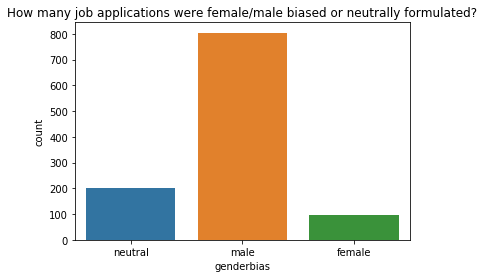

In [275]:
import seaborn as sns #this is the plotting library I'll be using 
import matplotlib.pyplot as plt #we need Matplotlib for setting the labels in the Seaborn graphs
sns.countplot(x="genderbias", data=df)
plt.title('How many job applications were female/male biased or neutrally formulated?')

In [276]:
df.head(5)

,JOB_CLASS_TITLE,Job Number,REQUIREMENT_SET_ID,JOB_DUTIES,ENTRY_SALARY_GEN,ENTRY_SALARY_DWP,OPEN_DATE,EDUCATION_YEARS,SCHOOL_TYPE,EDUCATION_MAJOR,...,EXAM_TYPE,req_list,raw_clean_job_text,REQUIREMENTS,all_text,masc_words,fem_words,amount_masc,amount_fem,genderbias
0,ARTS ASSOCIATE,2454,1,An Arts Associate performs a broad range of en...,"$48,797-$71,326",NaN,07-21-17,four-year,college or university,"Arts (design, literary, media/communication, p...",...,OPEN,1. A bachelor's degree from an accredited four...,ARTS ASSOCIATEClass Code: 2454 ...,1. A bachelor's degree from an accredited four...,An Arts Associate performs a broad range of en...,professional pro,nag respon,2,2,neutral
1,ARTS ASSOCIATE,2454,2,An Arts Associate performs a broad range of en...,"$48,797-$71,326",NaN,07-21-17,two-year,college with a,"Arts (design, literary, media/communication, p...",...,OPEN,An associate of arts degree from an accredite...,ARTS ASSOCIATEClass Code: 2454 ...,1. A bachelor's degree from an accredited four...,An Arts Associate performs a broad range of en...,professional pro,nag respon,2,2,neutral
2,ARTS ASSOCIATE,2454,3,An Arts Associate performs a broad range of en...,"$48,797-$71,326",NaN,07-21-17,NaN,NaN,NaN,...,OPEN,Four years of full-time paid experience withi...,ARTS ASSOCIATEClass Code: 2454 ...,1. A bachelor's degree from an accredited four...,An Arts Associate performs a broad range of en...,professional pro,nag respon,2,2,neutral
3,SENIOR COMMUNICATIONS ELECTRICIAN,3638,1,A Senior Communications Electrician acts as a ...,"$94,941 (flat-rated)","$114,568 (flat-rated)",03-03-17,NaN,NaN,NaN,...,INT_DEPT_PROM,Two years of full-time paid experience in a cl...,SENIOR COMMUNICATIONS ELECTRICIAN ...,Two years of full-time paid experience in a cl...,A Senior Communications Electrician acts as a ...,lead,,1,0,male
4,SENIOR AUTOMOTIVE SUPERVISOR,3716,1,A Senior Automotive Supervisor assists in plan...,"$103,126-$111,875",NaN,11-20-15,NaN,NaN,NaN,...,INT_DEPT_PROM,Two years of full-time paid experience with th...,SENIOR AUTOMOTIVE SUPERVISOR Class Code: ...,Two years of full-time paid experience with th...,A Senior Automotive Supervisor assists in plan...,analy force principle,respon,3,1,male


The job classification number overlaps with the other dataset we found of jobs in Los Angeles. This dataset includes number of sollicitants, female/male, but does not inclue a job description. We need to merge both datasets for this reason.

In [277]:
df_applicants = pd.read_csv('job_data/rows.csv')
df_applicants

,Fiscal Year,Job Number,Job Description,Apps Received,Female,Male,Unknown_Gender,Black,Hispanic,Asian,Caucasian,American Indian/ Alaskan Native,Filipino,Unknown_Ethnicity
0,2013-2014,9206 OP 2014/04/18,311 DIRECTOR 9206,54,20,31,3,25,18,1,6,0,0,4
1,2013-2014,1223 P 2013/08/09,ACCOUNTING CLERK 1223,648,488,152,8,151,204,123,62,3,79,26
2,2013-2014,7260 OP 2014/02/14,AIRPORT MANAGER 7260,51,13,37,1,8,12,9,20,0,0,2
3,2013-2014,3227 P 2013/11/15,AIRPORT POLICE LIEUTENANT 2013,48,9,38,1,21,14,3,7,0,1,2
4,2013-2014,2400 O 2014/05/02,AQUARIST 2400,40,15,24,1,3,7,7,19,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,2014-2015,7840 P 2014/7/25-ARCHIVE,WASTEWATER TREATMENT LABORATORY MANAGER 7840 -...,16,6,9,1,3,0,5,7,0,0,1
183,2014-2015,4123 O 2014/07/04-ARCHIVE,WASTEWATER TREATMENT OPERATOR 4123 - ARCHIVE,125,9,113,3,29,38,10,32,7,4,5
184,2014-2015,7857 O 2014/7/18-ARCHIVE,WATER MICROBIOLOGIST 7857 - ARCHIVE,179,89,82,8,13,37,64,25,0,18,22
185,2014-2015,3912/P/2014/07/25-ARCHIVE,WATER UTILITY WORKER 3912 - ARCHIVE,96,2,92,2,8,48,6,23,1,7,3


In [278]:
df_applicants["Job Number"]= df_applicants["Job Number"].astype(str) 

df_applicants['Job Number'] = df_applicants['Job Number'].str.slice(0,4)


df_applicants = df_applicants.drop([27, 64, 69, 72, 75])
df_applicants

,Fiscal Year,Job Number,Job Description,Apps Received,Female,Male,Unknown_Gender,Black,Hispanic,Asian,Caucasian,American Indian/ Alaskan Native,Filipino,Unknown_Ethnicity
0,2013-2014,9206,311 DIRECTOR 9206,54,20,31,3,25,18,1,6,0,0,4
1,2013-2014,1223,ACCOUNTING CLERK 1223,648,488,152,8,151,204,123,62,3,79,26
2,2013-2014,7260,AIRPORT MANAGER 7260,51,13,37,1,8,12,9,20,0,0,2
3,2013-2014,3227,AIRPORT POLICE LIEUTENANT 2013,48,9,38,1,21,14,3,7,0,1,2
4,2013-2014,2400,AQUARIST 2400,40,15,24,1,3,7,7,19,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,2014-2015,7840,WASTEWATER TREATMENT LABORATORY MANAGER 7840 -...,16,6,9,1,3,0,5,7,0,0,1
183,2014-2015,4123,WASTEWATER TREATMENT OPERATOR 4123 - ARCHIVE,125,9,113,3,29,38,10,32,7,4,5
184,2014-2015,7857,WATER MICROBIOLOGIST 7857 - ARCHIVE,179,89,82,8,13,37,64,25,0,18,22
185,2014-2015,3912,WATER UTILITY WORKER 3912 - ARCHIVE,96,2,92,2,8,48,6,23,1,7,3


In [279]:
df_applicants['Job Number'] = df_applicants['Job Number'].astype(int)
resulting_df = df.merge(
    df_applicants, left_on='Job Number', right_on='Job Number')
resulting_df.head()

,JOB_CLASS_TITLE,Job Number,REQUIREMENT_SET_ID,JOB_DUTIES,ENTRY_SALARY_GEN,ENTRY_SALARY_DWP,OPEN_DATE,EDUCATION_YEARS,SCHOOL_TYPE,EDUCATION_MAJOR,...,Female,Male,Unknown_Gender,Black,Hispanic,Asian,Caucasian,American Indian/ Alaskan Native,Filipino,Unknown_Ethnicity
0,ARTS ASSOCIATE,2454,1,An Arts Associate performs a broad range of en...,"$48,797-$71,326",NaN,07-21-17,four-year,college or university,"Arts (design, literary, media/communication, p...",...,430,240,32,96,173,84,211,5,40,93
1,ARTS ASSOCIATE,2454,2,An Arts Associate performs a broad range of en...,"$48,797-$71,326",NaN,07-21-17,two-year,college with a,"Arts (design, literary, media/communication, p...",...,430,240,32,96,173,84,211,5,40,93
2,ARTS ASSOCIATE,2454,3,An Arts Associate performs a broad range of en...,"$48,797-$71,326",NaN,07-21-17,NaN,NaN,NaN,...,430,240,32,96,173,84,211,5,40,93
3,SENIOR COMMUNICATIONS ELECTRICIAN,3638,1,A Senior Communications Electrician acts as a ...,"$94,941 (flat-rated)","$114,568 (flat-rated)",03-03-17,NaN,NaN,NaN,...,1,76,0,12,17,14,26,0,5,3
4,PIPEFITTER,3433,1,A Pipefitter does skilled work in the installa...,"$94,455 (flat-rated)","$101,622 (flat-rated)",08-03-18,NaN,apprenticeship,pipefitter,...,3,215,5,29,104,2,75,1,5,7


In [280]:
#as I will not be using the ethnicity I will delete this out of the dataframe
resulting_df = resulting_df.drop(['Black', 'Hispanic', 'Caucasian', 'Asian', 'American Indian/ Alaskan Native', 
                                  'Filipino', 'Unknown_Ethnicity' ], axis=1)
resulting_df

,JOB_CLASS_TITLE,Job Number,REQUIREMENT_SET_ID,JOB_DUTIES,ENTRY_SALARY_GEN,ENTRY_SALARY_DWP,OPEN_DATE,EDUCATION_YEARS,SCHOOL_TYPE,EDUCATION_MAJOR,...,fem_words,amount_masc,amount_fem,genderbias,Fiscal Year,Job Description,Apps Received,Female,Male,Unknown_Gender
0,ARTS ASSOCIATE,2454,1,An Arts Associate performs a broad range of en...,"$48,797-$71,326",NaN,07-21-17,four-year,college or university,"Arts (design, literary, media/communication, p...",...,nag respon,2,2,neutral,2013-2014,ARTS ASSOCIATE 2454,702,430,240,32
1,ARTS ASSOCIATE,2454,2,An Arts Associate performs a broad range of en...,"$48,797-$71,326",NaN,07-21-17,two-year,college with a,"Arts (design, literary, media/communication, p...",...,nag respon,2,2,neutral,2013-2014,ARTS ASSOCIATE 2454,702,430,240,32
2,ARTS ASSOCIATE,2454,3,An Arts Associate performs a broad range of en...,"$48,797-$71,326",NaN,07-21-17,NaN,NaN,NaN,...,nag respon,2,2,neutral,2013-2014,ARTS ASSOCIATE 2454,702,430,240,32
3,SENIOR COMMUNICATIONS ELECTRICIAN,3638,1,A Senior Communications Electrician acts as a ...,"$94,941 (flat-rated)","$114,568 (flat-rated)",03-03-17,NaN,NaN,NaN,...,,1,0,male,2013-2014,SENIOR COMMUNICATIONS ELECTRICIAN (3638),77,1,76,0
4,PIPEFITTER,3433,1,A Pipefitter does skilled work in the installa...,"$94,455 (flat-rated)","$101,622 (flat-rated)",08-03-18,NaN,apprenticeship,pipefitter,...,,1,0,male,2014-2015,PIPEFITTER 3433 - ARCHIVE,223,3,215,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,UNDERGROUND DISTRIBUTION CONSTRUCTION MECHANIC,3812,2,An Underground Distribution Construction Mecha...,"$70,783-$87,946",NaN,10-19-18,One year,NaN,NaN,...,respon son,2,2,neutral,2014-2015,UNDERGROUND DISTRIBUTION CONSTRUCTION MECHANIC...,591,7,573,11
289,UNDERGROUND DISTRIBUTION CONSTRUCTION MECHANIC,3812,3,An Underground Distribution Construction Mecha...,"$70,783-$87,946",NaN,10-19-18,NaN,NaN,NaN,...,respon son,2,2,neutral,2014-2015,UNDERGROUND DISTRIBUTION CONSTRUCTION MECHANIC...,591,7,573,11
290,UNDERGROUND DISTRIBUTION CONSTRUCTION MECHANIC,3812,4,An Underground Distribution Construction Mecha...,"$70,783-$87,946",NaN,10-19-18,One year,NaN,NaN,...,respon son,2,2,neutral,2014-2015,UNDERGROUND DISTRIBUTION CONSTRUCTION MECHANIC...,591,7,573,11
291,SENIOR PLUMBING INSPECTOR,4233,1,A Senior Plumbing Inspector supervises and tra...,"$90,410-$109,306",NaN,05-18-18,NaN,NaN,NaN,...,nag respon son,3,3,neutral,2013-2014,SENIOR PLUMBING INSPECTOR 4233 REVISED 4-10-14,25,1,24,0


In [281]:
#percentage of the amounts of women applied
resulting_df['%_Fem'] = resulting_df['Female']/resulting_df['Apps Received']
resulting_df.index.name = 'id'
resulting_df

,JOB_CLASS_TITLE,Job Number,REQUIREMENT_SET_ID,JOB_DUTIES,ENTRY_SALARY_GEN,ENTRY_SALARY_DWP,OPEN_DATE,EDUCATION_YEARS,SCHOOL_TYPE,EDUCATION_MAJOR,...,amount_masc,amount_fem,genderbias,Fiscal Year,Job Description,Apps Received,Female,Male,Unknown_Gender,%_Fem
id,,,,,,,,,,,,,,,,,,,,,
0,ARTS ASSOCIATE,2454,1,An Arts Associate performs a broad range of en...,"$48,797-$71,326",NaN,07-21-17,four-year,college or university,"Arts (design, literary, media/communication, p...",...,2,2,neutral,2013-2014,ARTS ASSOCIATE 2454,702,430,240,32,0.612536
1,ARTS ASSOCIATE,2454,2,An Arts Associate performs a broad range of en...,"$48,797-$71,326",NaN,07-21-17,two-year,college with a,"Arts (design, literary, media/communication, p...",...,2,2,neutral,2013-2014,ARTS ASSOCIATE 2454,702,430,240,32,0.612536
2,ARTS ASSOCIATE,2454,3,An Arts Associate performs a broad range of en...,"$48,797-$71,326",NaN,07-21-17,NaN,NaN,NaN,...,2,2,neutral,2013-2014,ARTS ASSOCIATE 2454,702,430,240,32,0.612536
3,SENIOR COMMUNICATIONS ELECTRICIAN,3638,1,A Senior Communications Electrician acts as a ...,"$94,941 (flat-rated)","$114,568 (flat-rated)",03-03-17,NaN,NaN,NaN,...,1,0,male,2013-2014,SENIOR COMMUNICATIONS ELECTRICIAN (3638),77,1,76,0,0.012987
4,PIPEFITTER,3433,1,A Pipefitter does skilled work in the installa...,"$94,455 (flat-rated)","$101,622 (flat-rated)",08-03-18,NaN,apprenticeship,pipefitter,...,1,0,male,2014-2015,PIPEFITTER 3433 - ARCHIVE,223,3,215,5,0.013453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,UNDERGROUND DISTRIBUTION CONSTRUCTION MECHANIC,3812,2,An Underground Distribution Construction Mecha...,"$70,783-$87,946",NaN,10-19-18,One year,NaN,NaN,...,2,2,neutral,2014-2015,UNDERGROUND DISTRIBUTION CONSTRUCTION MECHANIC...,591,7,573,11,0.011844
289,UNDERGROUND DISTRIBUTION CONSTRUCTION MECHANIC,3812,3,An Underground Distribution Construction Mecha...,"$70,783-$87,946",NaN,10-19-18,NaN,NaN,NaN,...,2,2,neutral,2014-2015,UNDERGROUND DISTRIBUTION CONSTRUCTION MECHANIC...,591,7,573,11,0.011844
290,UNDERGROUND DISTRIBUTION CONSTRUCTION MECHANIC,3812,4,An Underground Distribution Construction Mecha...,"$70,783-$87,946",NaN,10-19-18,One year,NaN,NaN,...,2,2,neutral,2014-2015,UNDERGROUND DISTRIBUTION CONSTRUCTION MECHANIC...,591,7,573,11,0.011844


## What are the jobs women apply most to (and what do they apply least to)

In [282]:
df_subset = resulting_df.drop_duplicates(subset=['Job Number'], keep=False) 
df_subset

,JOB_CLASS_TITLE,Job Number,REQUIREMENT_SET_ID,JOB_DUTIES,ENTRY_SALARY_GEN,ENTRY_SALARY_DWP,OPEN_DATE,EDUCATION_YEARS,SCHOOL_TYPE,EDUCATION_MAJOR,...,amount_masc,amount_fem,genderbias,Fiscal Year,Job Description,Apps Received,Female,Male,Unknown_Gender,%_Fem
id,,,,,,,,,,,,,,,,,,,,,
3,SENIOR COMMUNICATIONS ELECTRICIAN,3638,1,A Senior Communications Electrician acts as a ...,"$94,941 (flat-rated)","$114,568 (flat-rated)",03-03-17,NaN,NaN,NaN,...,1,0,male,2013-2014,SENIOR COMMUNICATIONS ELECTRICIAN (3638),77,1,76,0,0.012987
7,FIRE PROTECTION ENGINEERING ASSOCIATE,7978,1,A Fire Protection Engineering Associate perfor...,"$66,231-$96,841",NaN,04-13-18,four-year,college or university,engineering,...,3,0,male,2013-2014,FIRE PROTECTION ENGINEERING ASSOCIATE,107,16,89,2,0.149533
8,ARCHIVIST,1191,1,An Archivist performs professional archival wo...,"$57,273-$83,728",NaN,02-09-18,four-year,college or university,NaN,...,3,1,male,2013-2014,ARCHIVIST1191,161,89,66,6,0.552795
14,SENIOR UTILITY BUYER,1862,1,"A Senior Utility Buyer performs, plans, organi...","$107,364-$113,357",NaN,05-25-18,NaN,NaN,NaN,...,3,1,male,2013-2014,SENIOR UTILITY BUYER 1862,65,30,32,3,0.461538
15,UTILITY SERVICES SPECIALIST,3755,1,Promotes through extensive customer contacts t...,"$74,750-$92,895",NaN,07-21-17,four-year,college or university,NaN,...,4,3,male,2014-2015,UTILITY SERVICES SPECIALIST 3755 - ARCHIVE,735,409,282,44,0.556463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,DIRECTOR OF HOUSING,1568,1,"A Director of Housing plans, directs and coord...","$120,644-$171,654",NaN,06-23-17,NaN,NaN,NaN,...,4,3,male,2014-2015,DIRECTOR OF HOUSING (1568) - ARCHIVE,59,34,23,2,0.576271
273,SENIOR ELECTRICAL INSPECTOR,4223,1,A Senior Electrical Inspector supervises the w...,"$90,410-$109,306",NaN,04-27-18,NaN,NaN,NaN,...,1,2,female,2013-2014,SENIOR ELECTRICAL INSPECTOR 4223,16,2,14,0,0.125000
279,INFORMATION SYSTEMS MANAGER,1409,1,"An Information Systems Manager plans, organize...","$111,373-$158,500","$121,500-$150,962",09-01-17,NaN,NaN,International Information Systems Security Cer...,...,5,3,male,2013-2014,INFORMATION SYSTEMS MANAGER 1409,111,27,78,6,0.243243


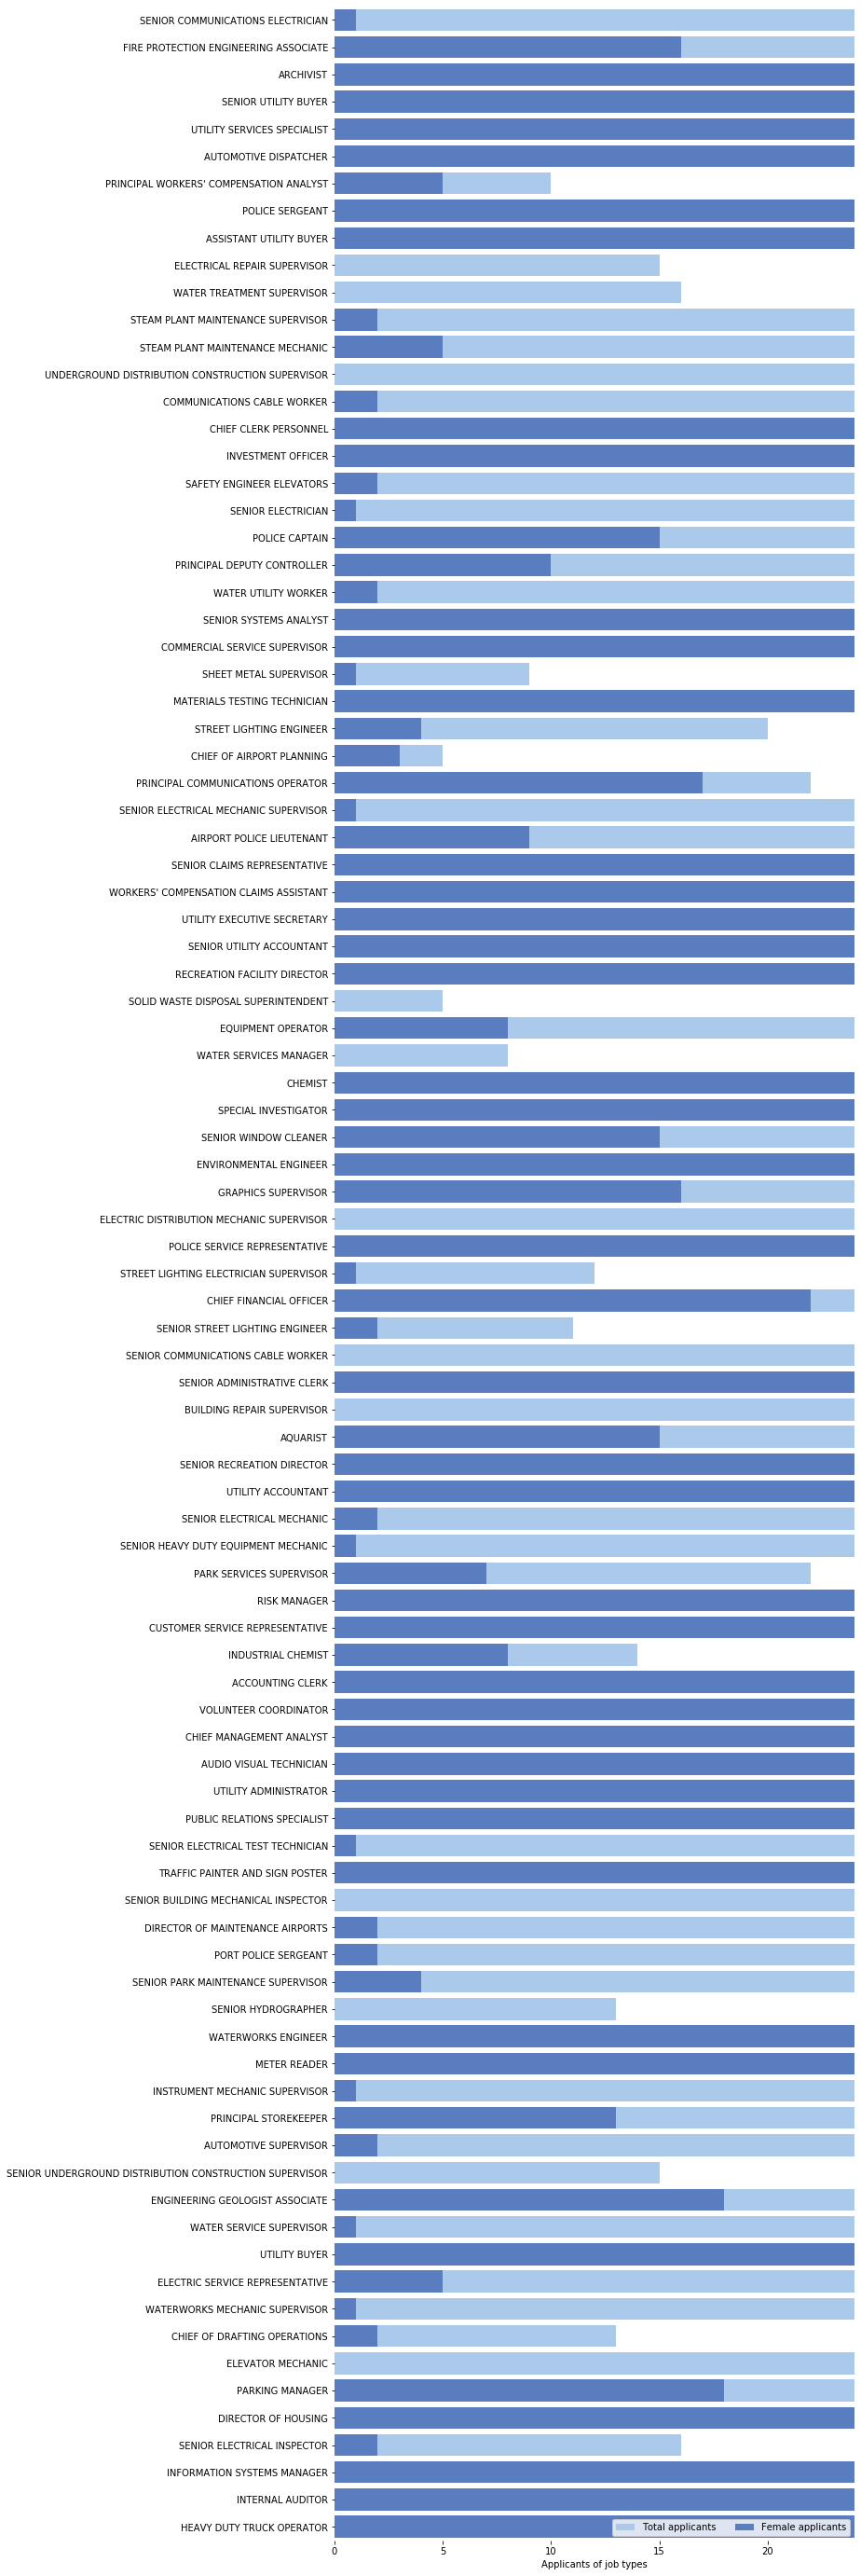

In [283]:
f, ax = plt.subplots(figsize=(10, 50))

sns.set_color_codes("pastel")
sns.barplot(x="Apps Received", y="JOB_CLASS_TITLE", data=df_subset,
            label="Total applicants", color="b")

sns.set_color_codes("muted")
sns.barplot(x="Female", y="JOB_CLASS_TITLE", data=df_subset,
            label="Female applicants", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Applicants of job types")
sns.despine(left=True, bottom=True)

## Do the male notated jobs also earn more? 

In [291]:
import numpy as np
df_subset['ENTRY_SALARY_GEN'].astype(str)
df_subset["calculated_salary"] = np.nan
df_subset["difference_words"] = np.nan
for index, row in df_subset.iterrows(): 
    if('flat-rated' in row['ENTRY_SALARY_GEN']):
        calculated_entry_sal = row['ENTRY_SALARY_GEN'].replace('(flat-rated)', '').replace('$', '').replace(',','')
        calculated_entry_sal = int(calculated_entry_sal)
        df_subset.loc[index,'calculated_salary'] = calculated_entry_sal
    else:
        before, sep, after = row['ENTRY_SALARY_GEN'].rpartition("-")
        before = before.replace('$', '').replace(',','')
        before = int(before)
        after = after.replace('$', '').replace(',','')
        after = int(after)
        #get median of salary given
        calculated_entry_sal = after - before
        df_subset.loc[index,'calculated_salary'] = calculated_entry_sal
    df_subset.loc[index,'difference_words'] = row['amount_masc'] - row['amount_fem']

df_subset
    

/Users/nienke/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/nienke/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/nienke/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on

,JOB_CLASS_TITLE,Job Number,REQUIREMENT_SET_ID,JOB_DUTIES,ENTRY_SALARY_GEN,ENTRY_SALARY_DWP,OPEN_DATE,EDUCATION_YEARS,SCHOOL_TYPE,EDUCATION_MAJOR,...,genderbias,Fiscal Year,Job Description,Apps Received,Female,Male,Unknown_Gender,%_Fem,calculated_salary,difference_words
id,,,,,,,,,,,,,,,,,,,,,
3,SENIOR COMMUNICATIONS ELECTRICIAN,3638,1,A Senior Communications Electrician acts as a ...,"$94,941 (flat-rated)","$114,568 (flat-rated)",03-03-17,NaN,NaN,NaN,...,male,2013-2014,SENIOR COMMUNICATIONS ELECTRICIAN (3638),77,1,76,0,0.012987,94941.0,1.0
7,FIRE PROTECTION ENGINEERING ASSOCIATE,7978,1,A Fire Protection Engineering Associate perfor...,"$66,231-$96,841",NaN,04-13-18,four-year,college or university,engineering,...,male,2013-2014,FIRE PROTECTION ENGINEERING ASSOCIATE,107,16,89,2,0.149533,30610.0,3.0
8,ARCHIVIST,1191,1,An Archivist performs professional archival wo...,"$57,273-$83,728",NaN,02-09-18,four-year,college or university,NaN,...,male,2013-2014,ARCHIVIST1191,161,89,66,6,0.552795,26455.0,2.0
14,SENIOR UTILITY BUYER,1862,1,"A Senior Utility Buyer performs, plans, organi...","$107,364-$113,357",NaN,05-25-18,NaN,NaN,NaN,...,male,2013-2014,SENIOR UTILITY BUYER 1862,65,30,32,3,0.461538,5993.0,2.0
15,UTILITY SERVICES SPECIALIST,3755,1,Promotes through extensive customer contacts t...,"$74,750-$92,895",NaN,07-21-17,four-year,college or university,NaN,...,male,2014-2015,UTILITY SERVICES SPECIALIST 3755 - ARCHIVE,735,409,282,44,0.556463,18145.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,DIRECTOR OF HOUSING,1568,1,"A Director of Housing plans, directs and coord...","$120,644-$171,654",NaN,06-23-17,NaN,NaN,NaN,...,male,2014-2015,DIRECTOR OF HOUSING (1568) - ARCHIVE,59,34,23,2,0.576271,51010.0,1.0
273,SENIOR ELECTRICAL INSPECTOR,4223,1,A Senior Electrical Inspector supervises the w...,"$90,410-$109,306",NaN,04-27-18,NaN,NaN,NaN,...,female,2013-2014,SENIOR ELECTRICAL INSPECTOR 4223,16,2,14,0,0.125000,18896.0,-1.0
279,INFORMATION SYSTEMS MANAGER,1409,1,"An Information Systems Manager plans, organize...","$111,373-$158,500","$121,500-$150,962",09-01-17,NaN,NaN,International Information Systems Security Cer...,...,male,2013-2014,INFORMATION SYSTEMS MANAGER 1409,111,27,78,6,0.243243,47127.0,2.0


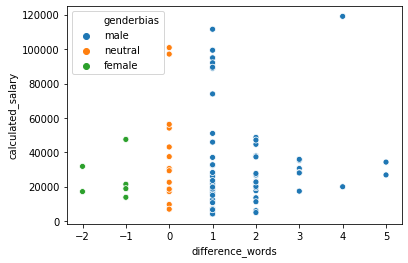

In [292]:
ax = sns.scatterplot(x="difference_words", y="calculated_salary", hue="genderbias", data=df_subset)

The plot above does show that feminine classified texts offer lower paying salary than the masculine classified texts.

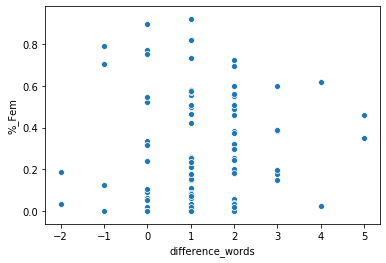

In [293]:
ax = sns.scatterplot(x="difference_words", y="%_Fem", data=df_subset)

My prediction would have been this would be an upgoing line (as a positive difference in words means it is male biased, a higher difference in words would mean a more male biased job description which would make it less appealing for women to apply). The graph however shows that there is no specific correlation between the two values.

In [295]:
from scipy.stats import pearsonr
corr, _ = pearsonr(df_subset["difference_words"],df_subset["%_Fem"])

print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.069


Pearson's R also shows there is very little correlation

In [205]:
from sklearn.feature_extraction.text import CountVectorizer #The CountVectorizer object

text = resulting_df['JOB_DUTIES'].values.astype('U') #Taking the text from the df. We need to convert it to Unicode
vect = CountVectorizer(stop_words='english') #Create the CV object, with English stop words
vect = vect.fit(text) #We fit the model with the words from the review text
vect
feature_names = vect.get_feature_names() #Get the words from the vocabulary
print(f"There are {len(feature_names)} words in the vocabulary. A selection: {feature_names[500:520]}")
docu_feat = vect.transform(text) #The transform method from the CountVectorizer object creates the matrix
print(docu_feat[0:500,0:500]) #Let's print a little part of the matrix: the first 50 words & documents

There are 1922 words in the vocabulary. A selection: ['defines', 'delinquent', 'deliveries', 'demanding', 'demographics', 'demonstrates', 'department', 'departmental', 'departments', 'deposit', 'deputy', 'describing', 'descriptions', 'design', 'designated', 'designer', 'designs', 'desired', 'detailed', 'details']
  (0, 47)	3
  (0, 55)	1
  (0, 122)	1
  (0, 125)	2
  (0, 133)	3
  (0, 134)	4
  (0, 135)	1
  (0, 156)	1
  (0, 231)	1
  (0, 262)	1
  (0, 345)	1
  (0, 355)	1
  (0, 364)	1
  (0, 412)	1
  (0, 446)	1
  (0, 478)	1
  (1, 47)	3
  (1, 55)	1
  (1, 122)	1
  (1, 125)	2
  (1, 133)	3
  (1, 134)	4
  (1, 135)	1
  (1, 156)	1
  (1, 231)	1
  :	:
  (288, 417)	1
  (289, 416)	1
  (289, 417)	1
  (290, 416)	1
  (290, 417)	1
  (291, 98)	1
  (291, 161)	1
  (291, 237)	1
  (291, 238)	1
  (291, 308)	1
  (291, 340)	2
  (291, 376)	1
  (291, 406)	2
  (291, 416)	1
  (291, 430)	1
  (292, 98)	1
  (292, 161)	1
  (292, 237)	1
  (292, 238)	1
  (292, 308)	1
  (292, 340)	2
  (292, 376)	1
  (292, 406)	2
  (292, 416)	1


## Predicting if job ad is either female, male or neutrally biased

In [189]:
y = resulting_df['genderbias'] #We need to take out the price as our Y-variable
X = docu_feat  #this slices the dataframe to include all rows I need

In [190]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data, store it into different variables

In [191]:
X_train

<205x1922 sparse matrix of type '<class 'numpy.int64'>'
	with 8684 stored elements in Compressed Sparse Row format>

In [192]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB() #clf = classifier
clf.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [193]:
from sklearn.metrics import confusion_matrix
y_test_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_test_pred)
cm

array([[ 3,  1,  0],
       [ 4, 65,  1],
       [ 0,  2, 12]])

In [194]:
# y_test.value_counts() works both
clf.classes_

array(['female', 'male', 'neutral'], dtype='<U7')

In [195]:
#In order to read it easily , let's make a dataframe out of it, and add labels to it.
conf_matrix = pd.DataFrame(cm, index=['female', 'male', 'neutral' ], columns = ['predicted female', 'predicted male', 'predicted neutral']) 
conf_matrix

,predicted female,predicted male,predicted neutral
female,3,1,0
male,4,65,1
neutral,0,2,12


In [196]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

      female       0.43      0.75      0.55         4
        male       0.96      0.93      0.94        70
     neutral       0.92      0.86      0.89        14

    accuracy                           0.91        88
   macro avg       0.77      0.85      0.79        88
weighted avg       0.93      0.91      0.92        88



In [197]:
from sklearn.metrics import accuracy_score
y_pred_valid = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred_valid)
acc

0.9090909090909091

As acurracy is 0.91 it is pretty height. If the algorithm had to guess the chance would be 1/3 (33%) of getting it right.

## Using Bernoulli NB

In [298]:
from sklearn.naive_bayes import BernoulliNB
clf_b = BernoulliNB()
clf_b.fit(X, y)
BernoulliNB()

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [302]:
y_test_pred_b = clf_b.predict(X_test)
cm = confusion_matrix(y_test, y_test_pred_b)
cm

array([[ 0,  4,  0],
       [ 1, 69,  0],
       [ 0,  1, 13]])

In [303]:
print(classification_report(y_test,y_test_pred_b))

              precision    recall  f1-score   support

      female       0.00      0.00      0.00         4
        male       0.93      0.99      0.96        70
     neutral       1.00      0.93      0.96        14

    accuracy                           0.93        88
   macro avg       0.64      0.64      0.64        88
weighted avg       0.90      0.93      0.92        88



Accuracy has improved, however precision & recall have not

## Using Multinomial NB

In [301]:
clf_m = MultinomialNB()
clf_m.fit(X, y)
MultinomialNB()

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [304]:
y_test_pred_m = clf_m.predict(X_test)
cm = confusion_matrix(y_test, y_test_pred_m)
cm

array([[ 3,  1,  0],
       [ 3, 67,  0],
       [ 0,  0, 14]])

In [305]:
print(classification_report(y_test,y_test_pred_m))

              precision    recall  f1-score   support

      female       0.50      0.75      0.60         4
        male       0.99      0.96      0.97        70
     neutral       1.00      1.00      1.00        14

    accuracy                           0.95        88
   macro avg       0.83      0.90      0.86        88
weighted avg       0.97      0.95      0.96        88



Accuracy is better than regular NB and Bernoulli NB. So are the precision & recall